In [1]:
import tensorflow
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd

df = pd.read_csv('/content/fashion-mnist_test.csv',encoding= 'unicode_escape')

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


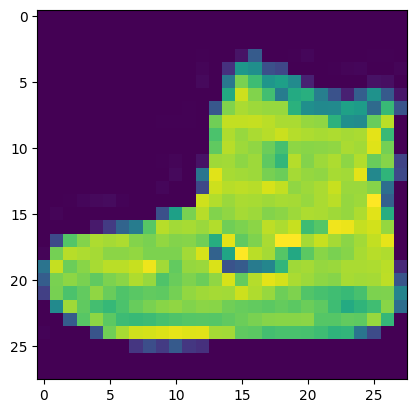

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [9]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 8s 9ms/step - loss: 0.5402 - accuracy: 0.8110 - val_loss: 0.4238 - val_accuracy: 0.8523
Epoch 2/20
750/750 [==============================] - 6s 7ms/step - loss: 0.3999 - accuracy: 0.8591 - val_loss: 0.4003 - val_accuracy: 0.8553
Epoch 3/20
750/750 [==============================] - 7s 10ms/step - loss: 0.3585 - accuracy: 0.8721 - val_loss: 0.3692 - val_accuracy: 0.8713
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 0.3322 - accuracy: 0.8789 - val_loss: 0.3470 - val_accuracy: 0.8799
Epoch 5/20
750/750 [==============================] - 6s 9ms/step - loss: 0.3135 - accuracy: 0.8857 - val_loss: 0.3478 - val_accuracy: 0.8737
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2964 - accuracy: 0.8916 - val_loss: 0.3354 - val_accuracy: 0.8777
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2827 - accuracy: 0.8967 - val_loss: 0.3293 - val_accuracy: 0.8835
Epoch

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4026 - accuracy: 0.8720


[0.4025631844997406, 0.871999979019165]

In [13]:
model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[9.6194963e-09, 1.2045344e-11, 1.5676141e-08, ..., 8.6236966e-04,
        6.6906651e-08, 9.9883205e-01],
       [1.5994649e-06, 6.3795643e-13, 9.9983501e-01, ..., 1.4786907e-17,
        2.0531051e-12, 1.7242391e-18],
       [1.1157372e-09, 9.9999994e-01, 5.8778246e-15, ..., 8.5708442e-20,
        5.1269336e-12, 1.0535092e-17],
       ...,
       [8.9256764e-06, 9.4140798e-13, 1.6195730e-07, ..., 1.5952456e-09,
        9.9995309e-01, 2.0710036e-16],
       [2.7672744e-08, 9.9968612e-01, 9.0059116e-10, ..., 5.1999154e-15,
        1.7428166e-08, 6.7702505e-10],
       [2.3989011e-07, 3.7985706e-10, 3.3856588e-07, ..., 2.4321083e-04,
        7.9567617e-06, 1.3553993e-06]], dtype=float32)

In [14]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(predictions)

[9 2 1 ... 8 1 5]
